In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="32maps_alpha"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_32maps_alpha_2sE_dataset_pretokenize/output_32maps_alpha_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

RRR: 506
KKK: 462
```: 462
IIIII: 445
BBBBB: 436
ZZZ: 435
^^^: 430
^^^^: 425
EEE: 425
QQQQQ: 423
LLLLL: 417
YYYYY: 413
_____: 411
TTTTT: 411
MMMMM: 411
EEEE: 411
NNN: 411
[[[[[: 409
]]]]]: 408
TT: 408
PPPPP: 405
DDDDD: 402
[[: 402
YYYY: 402
OOOOO: 402
UUUUUU: 398
FF: 397
VVVVV: 396
]]]: 396
AA: 395
HH: 395
\\\\: 394
III: 393
RRRR: 393
UUUUU: 393
WWWW: 392
KKKK: 391
YYY: 391
[[[: 391
````: 390
PPP: 390
DDD: 390
\\: 389
PPPP: 388
`````: 386
CCCCC: 386
HHHH: 386
DDDD: 386
XXXXXX: 385
QQQ: 384
WWW: 384
KKKKK: 384
FFFFF: 384
JJJJJ: 384
JJJ: 383
OO: 383
NNNNNN: 382
EEEEE: 382
\\\\\: 380
MMM: 379
AAAAA: 379
^^^^^: 378
SS: 378
^^: 378
MMMMMM: 378
SSSSS: 378
____: 377
VVV: 377
ZZZZ: 376
XXX: 376
GGGGG: 375
GG: 375
RRRRR: 375
__: 373
CCCC: 373
AAAAAA: 372
PPPPPP: 372
\\\: 372
IIII: 370
CC: 370
]]: 370
OOOO: 369
SSSS: 369
HHHHH: 368
II: 368
DD: 368
ZZZZZ: 367
______: 367
DDDDDD: 367
YY: 367
VVVV: 367
WWWWWW: 367
FFFF: 367
VV: 366
WWWWW: 366
]]]]]]: 365
___: 365
GGGGGG: 365
YYYYYY: 364
VVVVVV: 363

In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

133: 506
132: 462
131: 462
155: 445
137: 436
129: 435
128: 430
96: 425
130: 425
153: 423
146: 417
143: 413
159: 411
145: 411
151: 411
101: 411
120: 411
154: 409
150: 408
51: 408
157: 405
160: 402
57: 402
83: 402
141: 402
192: 398
39: 397
144: 396
112: 396
38: 395
40: 395
85: 394
122: 393
90: 393
139: 393
100: 392
97: 391
106: 391
123: 391
94: 390
126: 390
124: 390
53: 389
93: 388
156: 386
140: 386
73: 386
99: 386
187: 385
116: 384
127: 384
162: 384
135: 384
148: 384
121: 383
46: 383
201: 382
166: 382
147: 380
119: 379
136: 379
158: 378
44: 378
64: 378
174: 378
142: 378
95: 377
117: 377
98: 376
109: 376
152: 375
59: 375
173: 375
62: 373
82: 373
178: 372
195: 372
113: 372
91: 370
47: 370
54: 370
81: 369
77: 369
134: 368
58: 368
65: 368
165: 367
202: 367
207: 367
48: 367
76: 367
208: 367
72: 367
45: 366
167: 366
182: 365
125: 365
193: 365
183: 364
199: 363
86: 362
198: 361
197: 361
61: 361
50: 361
186: 361
66: 360
191: 359
149: 359
114: 359
84: 359
42: 359
170: 358
69: 358
180: 357
78: 35

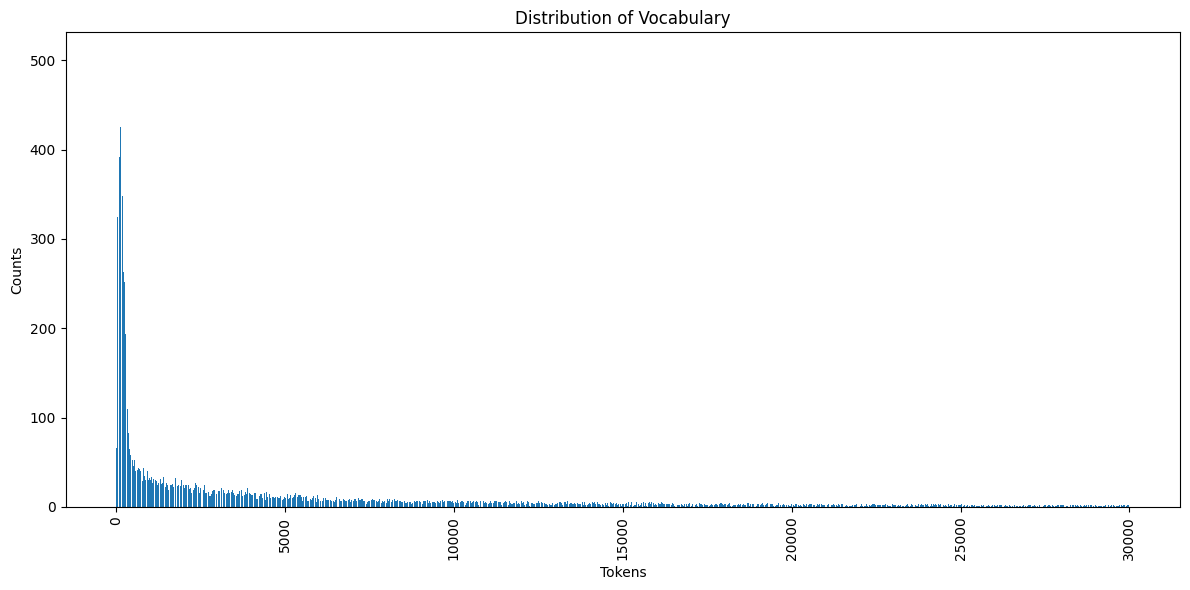

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


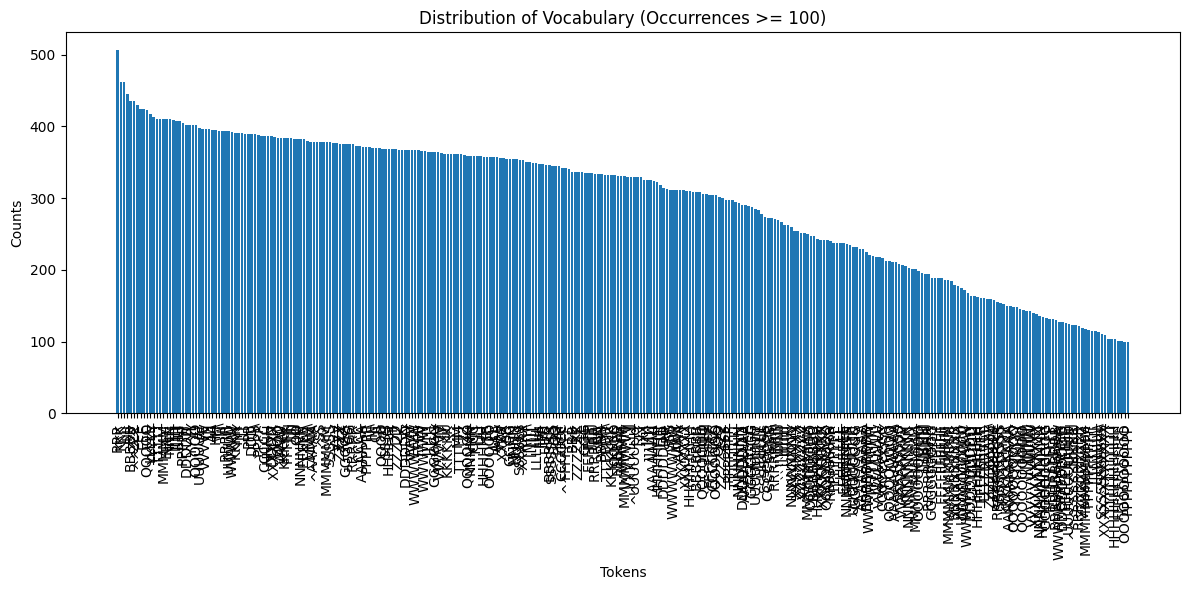

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 310
vocab_count_decoded: 28465
recommended size vocab: 326


In [18]:
#train has 3,020,525 tokens
#val has 332,993 tokens

In [19]:
#whole dataset
#filtered_vocab_count: 3637
#vocab_count_decoded: 29572
#recommended size vocab: 3828